In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing


In [ ]:
# Load California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Price"] = data.target  # Target variable
df.head()  # Show first few rows


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Split into features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a simple Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions & Performance
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.4f}")


Linear Regression MSE: 0.5559


In [ ]:
# Train a Ridge Regression model (L2 Regularization)
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predictions & Performance
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.4f}")


Ridge Regression MSE: 0.5558


In [ ]:
# Train a Lasso Regression model (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_train, y_train)

# Predictions & Performance
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.4f}")


Lasso Regression MSE: 0.6135


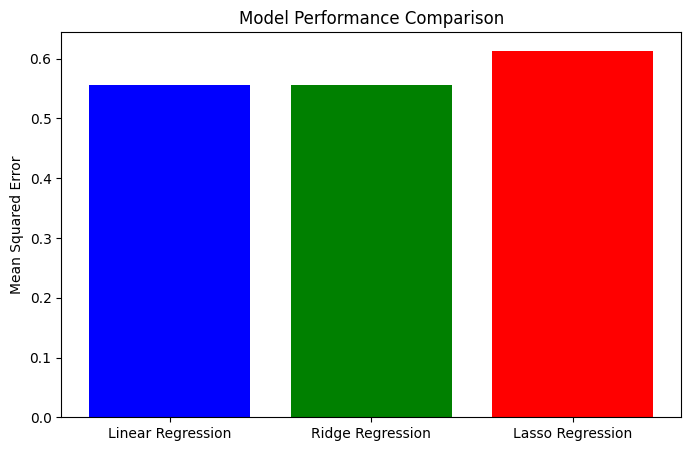

In [ ]:
# Compare the errors
models = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
mse_values = [mse_lr, mse_ridge, mse_lasso]

plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=["blue", "green", "red"])
plt.ylabel("Mean Squared Error")
plt.title("Model Performance Comparison")
plt.show()
